## В данном ноутбуке приводится аналитический срез, который не удалось построить в Google Dushboards.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

## Загрузка и предварительная обработка данных

In [2]:
df = pd.read_csv('Data Sample (AIC-1)_NK - Online Retail.csv', 
                  dtype = {
                      'InvoiceNo': str,
                      'StockCode': str,
                      'Description': str,
                      'Quantity': int,
                      'InvoiceDate': str,
                      'UnitPrice': str,
                      'Revenue': str,
                      'CustomerID': str,
                      'Country': str
                  })

In [3]:
df['UnitPrice'] = df['UnitPrice'].apply(lambda x: float(x.replace(',', '.')))
df['Revenue'] = df['Revenue'].apply(lambda x: float(x.replace(',', '.')))
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Revenue,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,54.08,13047,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,17.85,13047,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,14.85,13047,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,22.00,17850,United Kingdom


In [5]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Revenue,CustomerID,Country
count,54214,54214,54080,54214.000000,54214,54214.000000,54214.000000,40643,54214
unique,14877,3351,3401,NaN,14058,NaN,NaN,3819,37
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,17841,United Kingdom
freq,127,237,243,NaN,127,NaN,NaN,771,49602
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.610802,NaN,4.307341,18.447189,NaN,NaN
std,NaN,NaN,NaN,57.358422,NaN,47.834496,83.326884,NaN,NaN
min,NaN,NaN,NaN,-9600.000000,NaN,0.000000,-6930.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,3.480000,NaN,NaN


In [13]:
for col in df.columns:
    print(col, ' na values: ', sum(df[col].isna()))

InvoiceNo  na values:  0
StockCode  na values:  0
Description  na values:  134
Quantity  na values:  0
InvoiceDate  na values:  0
UnitPrice  na values:  0
Revenue  na values:  0
CustomerID  na values:  13571
Country  na values:  0


## Описательная статистика

In [20]:
df.shape

(54214, 9)

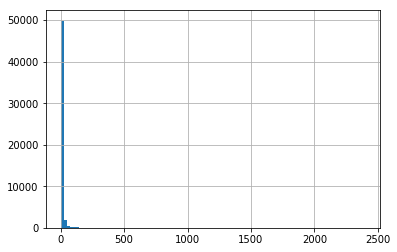

In [101]:
df[df['Quantity'] > 0]['Quantity'].hist(bins=100)

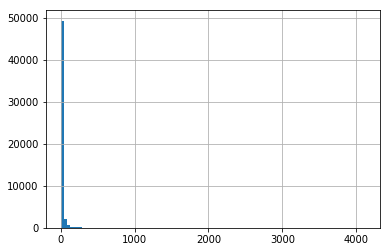

In [102]:
df[df['Quantity'] > 0]['Revenue'].hist(bins=100)

#### Гистограммы распределения количества и суммы покупаемых товаров показывает, что большинство покупок - мелкие - 1 или 2 товара с незначительной суммой чека. Это позволяет сделать вывод о том, что магазин специализируется на розничных продажах недорогих товаров.

In [40]:
# количество уникальных клиентов
print('количество уникальных клиентов: ', df.CustomerID.unique().shape[0])

количество уникальных клиентов:  3820


In [46]:
# клиенты с наибольшим числом купленных позиций (строчек)
print('топ-10 клиентов с наибольшим числом купленных позиций:')
print(df.CustomerID.value_counts()[:10])

топ-10 клиентов с наибольшим числом купленных позиций:
17841    771
14911    563
14096    546
12748    447
14606    278
15311    255
14646    195
13089    180
13263    166
14298    160
Name: CustomerID, dtype: int64


In [44]:
# средний чек по странам
print('топ-10 стран по размеру среднего чека: ')
df[['Country', 'Revenue']].groupby(['Country']).mean().sort_values(by='Revenue', ascending=False)[:10]

топ-10 стран по размеру среднего чека: 


,Revenue
Country,
Australia,131.330462
Netherlands,112.255470
Sweden,74.970400
Japan,60.653939
Denmark,58.824000
Lithuania,48.600000
Czech Republic,41.100000
Lebanon,39.600000
Norway,36.760952


In [47]:
# средний чек покупки по всем странам
print('размер среднего чека покупки: ')
df['Revenue'].mean()

размер среднего чека: 


18.447188751982996

In [59]:
print('количество проданных товаров: ', df[df['Quantity'] >= 0]['Quantity'].sum())
print('количество возвращенных товаров (включая, возможно, техн.транзакции): ', -df[df['Quantity'] < 0]['Quantity'].sum())
print('выручка от проданных товаров: %.2f' % df[df['Quantity'] >= 0]['Revenue'].sum())
print('сумма от возврата товаров (включая, возможно, техн.транзакции): %.2f' % -df[df['Quantity'] < 0]['Revenue'].sum())

количество проданных товаров:  555980
количество возвращенных товаров (включая, возможно, техн.транзакции):  34940
выручка от проданных товаров: 1056167.99
сумма от возврата товаров (включая, возможно, техн.транзакции): 56072.10


In [96]:
print('топ-10 клиентов по размеру среднего чека: ')
df[['CustomerID', 'Revenue', 'Country']].groupby(['CustomerID', 'Country']).mean().sort_values(by='Revenue', 
                                                                                               ascending=False)[:10]

топ-10 клиентов по размеру среднего чека: 


,,Revenue
CustomerID,Country,
15195,United Kingdom,3861.000000
17949,United Kingdom,1506.010000
16333,United Kingdom,1181.733333
16041,United Kingdom,1044.000000
16698,United Kingdom,816.000000
15299,United Kingdom,642.000000
17857,United Kingdom,621.630000
18102,United Kingdom,617.056744
15649,United Kingdom,510.000000


In [92]:
print('Средний чек по клиенту: ')
df[['CustomerID', 'Revenue']].groupby(['CustomerID']).mean().mean()

Средний чек по клиенту: 


Revenue    23.498036
dtype: float64

In [93]:
# ARPU
print('ARPU: ')
df['Revenue'].sum()/len(df['CustomerID'].unique())

ARPU: 


261.8052070680628

## Проверка гипотез

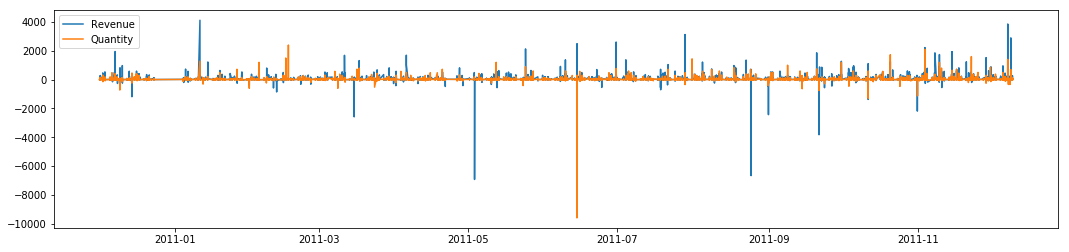

In [79]:
plt.figure(figsize=(18, 4))
plt.plot(df['InvoiceDate'], df['Revenue'], label='Revenue')
plt.plot(df['InvoiceDate'], df['Quantity'], label='Quantity')
plt.legend()
plt.show()

#### Посмотрим какие данные линейно зависимы:

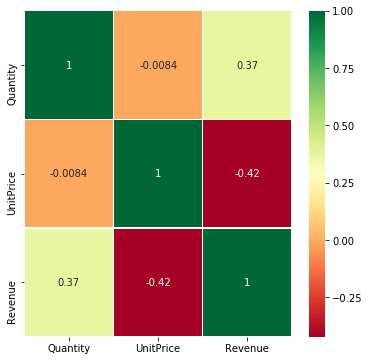

In [108]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

#### По матрице корреляций можно сделать следующие выводы: 
#### 1. Наблюдается незначительная положительная корреляция между количеством товаров в чеке и суммой чека.
#### 2. Наблюдается незначительная отрицательная корреляция между ценой одной единицы товара и суммой чека , что позволяет сделать вывод о том, что продажи с наибольшей суммой чека формируются товарами с наименьшей ценой.
#### 3. Нет зависимости между ценой проданных товаров и их количеством.

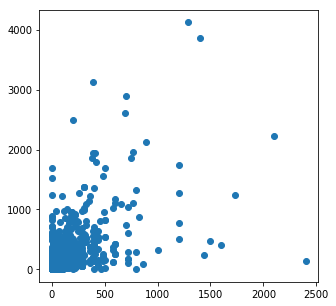

In [77]:
plt.figure(figsize=(5, 5))
plt.scatter(df[df['Quantity'] > 0]['Quantity'], df[df['Quantity'] > 0]['Revenue'])
plt.show()

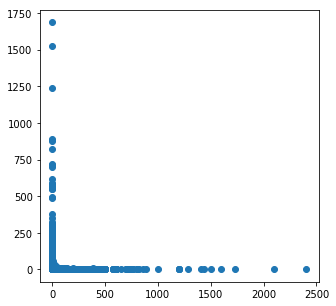

In [78]:
plt.figure(figsize=(5, 5))
plt.scatter(df[df['Quantity'] > 0]['Quantity'], df[df['Quantity'] > 0]['UnitPrice'])
plt.show()

## Анализ отрицательных транзакций

#### В наборе данных присутствуют транзакции с отрицательным количеством товаров. Визуальный анализ данных позволяет предположить, что это либо возвраты, либо технические списания.

In [38]:
df[df['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Revenue,CustomerID,Country
19,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,-4.65,15311,United Kingdom
30,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,-6.96,17548,United Kingdom
31,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,-6.96,17548,United Kingdom
202,C536548,20957,PORCELAIN HANGING BELL SMALL,-1,2010-12-01 14:33:00,1.45,-1.45,12472,Germany
375,C536642,21463,MIRRORED DISCO BALL,-1,2010-12-02 11:56:00,5.95,-5.95,14390,United Kingdom
399,C536734,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2010-12-02 12:50:00,7.95,-7.95,16042,United Kingdom
437,C536758,21314,SMALL GLASS HEART TRINKET POT,-1,2010-12-02 14:25:00,2.10,-2.10,13767,United Kingdom
442,C536760,22273,FELTCRAFT DOLL MOLLY,-3,2010-12-02 14:29:00,2.95,-8.85,17547,United Kingdom
488,C536812,22130,PARTY CONE CHRISTMAS DECORATION,-144,2010-12-02 16:58:00,0.72,-103.68,16546,United Kingdom
489,C536820,22877,NUMBER TILE COTTAGE GARDEN 9,-1,2010-12-02 17:14:00,1.95,-1.95,18168,United Kingdom


In [ ]:
print('количество проданных товаров: ', df[df['Quantity'] >= 0]['Quantity'].sum())
print('количество возвращенных товаров (включая, возможно, техн.транзакции): ', -df[df['Quantity'] < 0]['Quantity'].sum())
print('выручка от проданных товаров: %.2f' % df[df['Quantity'] >= 0]['Revenue'].sum())
print('сумма от возврата товаров (включая, возможно, техн.транзакции): %.2f' % -df[df['Quantity'] < 0]['Revenue'].sum())

In [112]:
# процент количества возвращенных товаров от общего количества проданных товаров
(-df[df['Quantity'] < 0]['Quantity'].sum()) / (df[df['Quantity'] >= 0]['Quantity'].sum()) * 100

6.2843987193783954

In [113]:
# процент возвращенных товаров от общего количества проданных товаров в выручке
(-df[df['Quantity'] < 0]['Revenue'].sum()) / (df[df['Quantity'] >= 0]['Revenue'].sum()) * 100

5.309013384027087